<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/%EC%99%95%EB%B3%B4%ED%98%84%EA%B5%90%EC%88%98%EB%8B%98%EC%BD%94%EB%93%9C%EC%8B%A4%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
features_num = 3
num = 280

Train_dataset = np.loadtxt('/content/drive/MyDrive/EXP-I_20121008_0006_0009_20120426061623_cell.csv', delimiter=",", skiprows=1)
X_train = Train_dataset[:num, 0:features_num]
Y_train = Train_dataset[:num, features_num]

X_test = Train_dataset[num:331, 0:features_num]
Y_test = Train_dataset[num:331, features_num]



In [ ]:
def make_dataset(data, label, window_size=2):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
# train dataset (실제 예측 해볼 데이터)
train_feature, train_label = make_dataset(X_train, Y_train, 2)


In [ ]:
test_feature, test_label = make_dataset(X_test, Y_test, 2)
test_feature.shape, test_label.shape

((49, 2, 3), (49,))

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)


In [ ]:
x_train.shape, x_valid.shape

((222, 2, 3), (56, 2, 3))

In [ ]:
model = Sequential()
model.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1280      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('C:/Users/wlsrm/data', 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


In [ ]:
history = model.fit(x_train, y_train,
                                    epochs=200,
                                    batch_size=5,
                                    validation_data=(x_valid, y_valid),
                                    callbacks=[early_stop, checkpoint])


Epoch 1/200
45/45 [==============================] - 4s 11ms/step - loss: 0.0460 - val_loss: 0.0129

Epoch 00001: val_loss improved from inf to 0.01286, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 2/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0163 - val_loss: 0.0161

Epoch 00002: val_loss did not improve from 0.01286
Epoch 3/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0130 - val_loss: 0.0081

Epoch 00003: val_loss improved from 0.01286 to 0.00809, saving model to C:/Users/wlsrm/data/tmp_checkpoint.h5
Epoch 4/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0095

Epoch 00004: val_loss did not improve from 0.00809
Epoch 5/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.0094

Epoch 00005: val_loss did not improve from 0.00809
Epoch 6/200
45/45 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0132

Epoch 00006: val_loss did not 

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

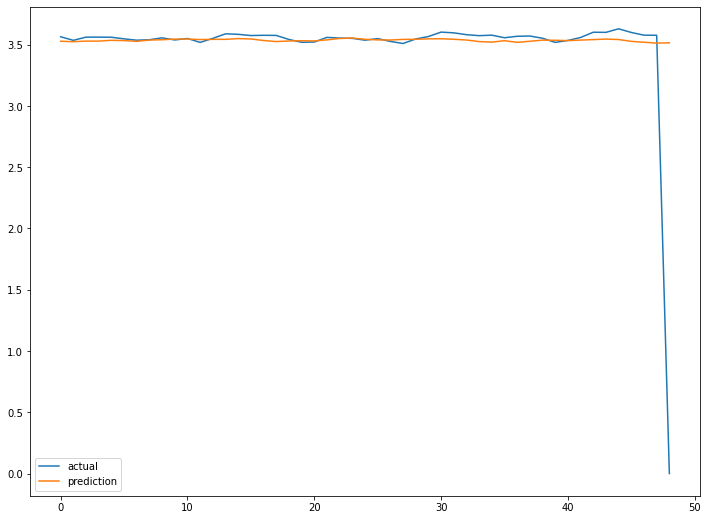

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()